<a href="https://colab.research.google.com/github/ifonlyheknew/finalprojeck/blob/main/diabetes_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/ml/diabetes_risk_prediction_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

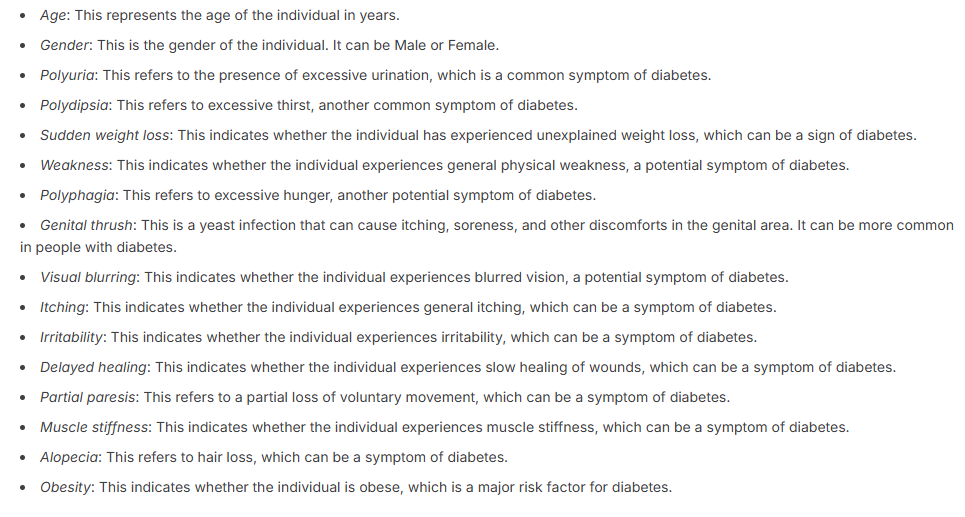

In [ ]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
#Первичный осмотр данных
print("=== ИНФОРМАЦИЯ О ДАННЫХ ===")
print("Первые 5 строк:")
print(df.head())
print("\nРазмер данных:", df.shape)
print("\nКолонки:", df.columns.tolist())
print("\nТипы данных:")
print(df.dtypes)
print("\nПропущенные значения:")
print(df.isnull().sum())

=== ИНФОРМАЦИЯ О ДАННЫХ ===
Первые 5 строк:
   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     clas


=== АНАЛИЗ ВЫБРОСОВ В Age ===
Q1: 39.0, Q3: 58.0, IQR: 19.0
Границы: [10.5, 86.5]
Найдено выбросов: 1


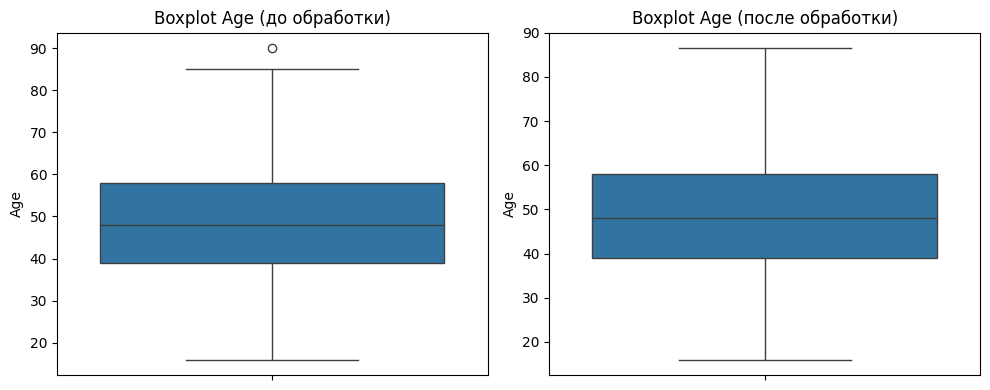

In [ ]:
#Анализ выбросов в Age (если есть такая колонка)
if 'Age' in df.columns:
    print("\n=== АНАЛИЗ ВЫБРОСОВ В Age ===")
    Q1 = df['Age'].quantile(0.25)
    Q3 = df['Age'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Границы: [{lower_bound:.1f}, {upper_bound:.1f}]")

    outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
    print(f"Найдено выбросов: {len(outliers)}")

    # Визуализация выбросов
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df['Age'])
    plt.title('Boxplot Age (до обработки)')

    # Ограничение выбросов
    df['Age'] = np.where(df['Age'] > upper_bound, upper_bound,
                         np.where(df['Age'] < lower_bound, lower_bound, df['Age']))

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['Age'])
    plt.title('Boxplot Age (после обработки)')
    plt.tight_layout()
    plt.show()

In [ ]:
binary_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        unique_vals = df[col].unique()
        print(f"{col}: {unique_vals} (всего {len(unique_vals)} значений)")
        if len(unique_vals) == 2:
            binary_cols.append(col)

# Бинарное кодирование 0/1
for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print(f"{col}: закодирован как {le.classes_} -> {le.transform(le.classes_)}")

Gender: ['Male' 'Female'] (всего 2 значений)
Polyuria: ['No' 'Yes'] (всего 2 значений)
Polydipsia: ['Yes' 'No'] (всего 2 значений)
sudden weight loss: ['No' 'Yes'] (всего 2 значений)
weakness: ['Yes' 'No'] (всего 2 значений)
Polyphagia: ['No' 'Yes'] (всего 2 значений)
Genital thrush: ['No' 'Yes'] (всего 2 значений)
visual blurring: ['No' 'Yes'] (всего 2 значений)
Itching: ['Yes' 'No'] (всего 2 значений)
Irritability: ['No' 'Yes'] (всего 2 значений)
delayed healing: ['Yes' 'No'] (всего 2 значений)
partial paresis: ['No' 'Yes'] (всего 2 значений)
muscle stiffness: ['Yes' 'No'] (всего 2 значений)
Alopecia: ['Yes' 'No'] (всего 2 значений)
Obesity: ['Yes' 'No'] (всего 2 значений)
class: ['Positive' 'Negative'] (всего 2 значений)
Gender: закодирован как ['Female' 'Male'] -> [0 1]
Polyuria: закодирован как ['No' 'Yes'] -> [0 1]
Polydipsia: закодирован как ['No' 'Yes'] -> [0 1]
sudden weight loss: закодирован как ['No' 'Yes'] -> [0 1]
weakness: закодирован как ['No' 'Yes'] -> [0 1]
Polyphagia:

In [ ]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41.0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48.0,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58.0,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32.0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0



=== РАСПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (class) ===
class
1    173
0     78
Name: count, dtype: int64


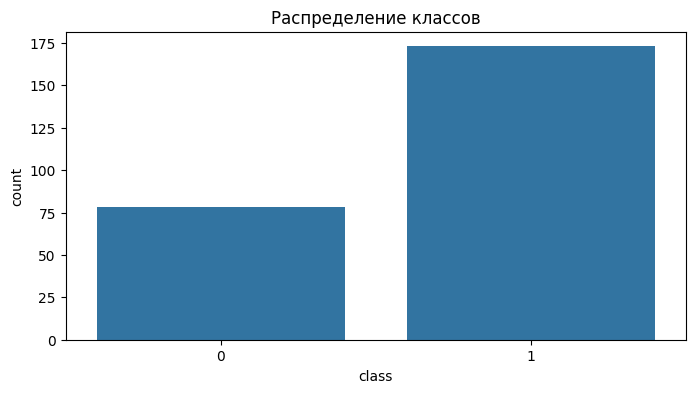

Соотношение классов: 2.22:1


In [ ]:
print(f"\n=== РАСПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ ({'class'}) ===")
class_distribution = df['class'].value_counts()
print(class_distribution)

plt.figure(figsize=(8, 4))
sns.countplot(x=df['class'])
plt.title(f'Распределение классов')
plt.show()

# Вычисление дисбаланса
imbalance_ratio = class_distribution.max() / class_distribution.min()
print(f"Соотношение классов: {imbalance_ratio:.2f}:1")

In [ ]:
# Масштабируем Age
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])


In [ ]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,-0.710490,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.734476,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,-0.630214,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,-0.309110,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.895028,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,-0.790765,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,-0.068282,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,0.734476,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,-1.352697,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


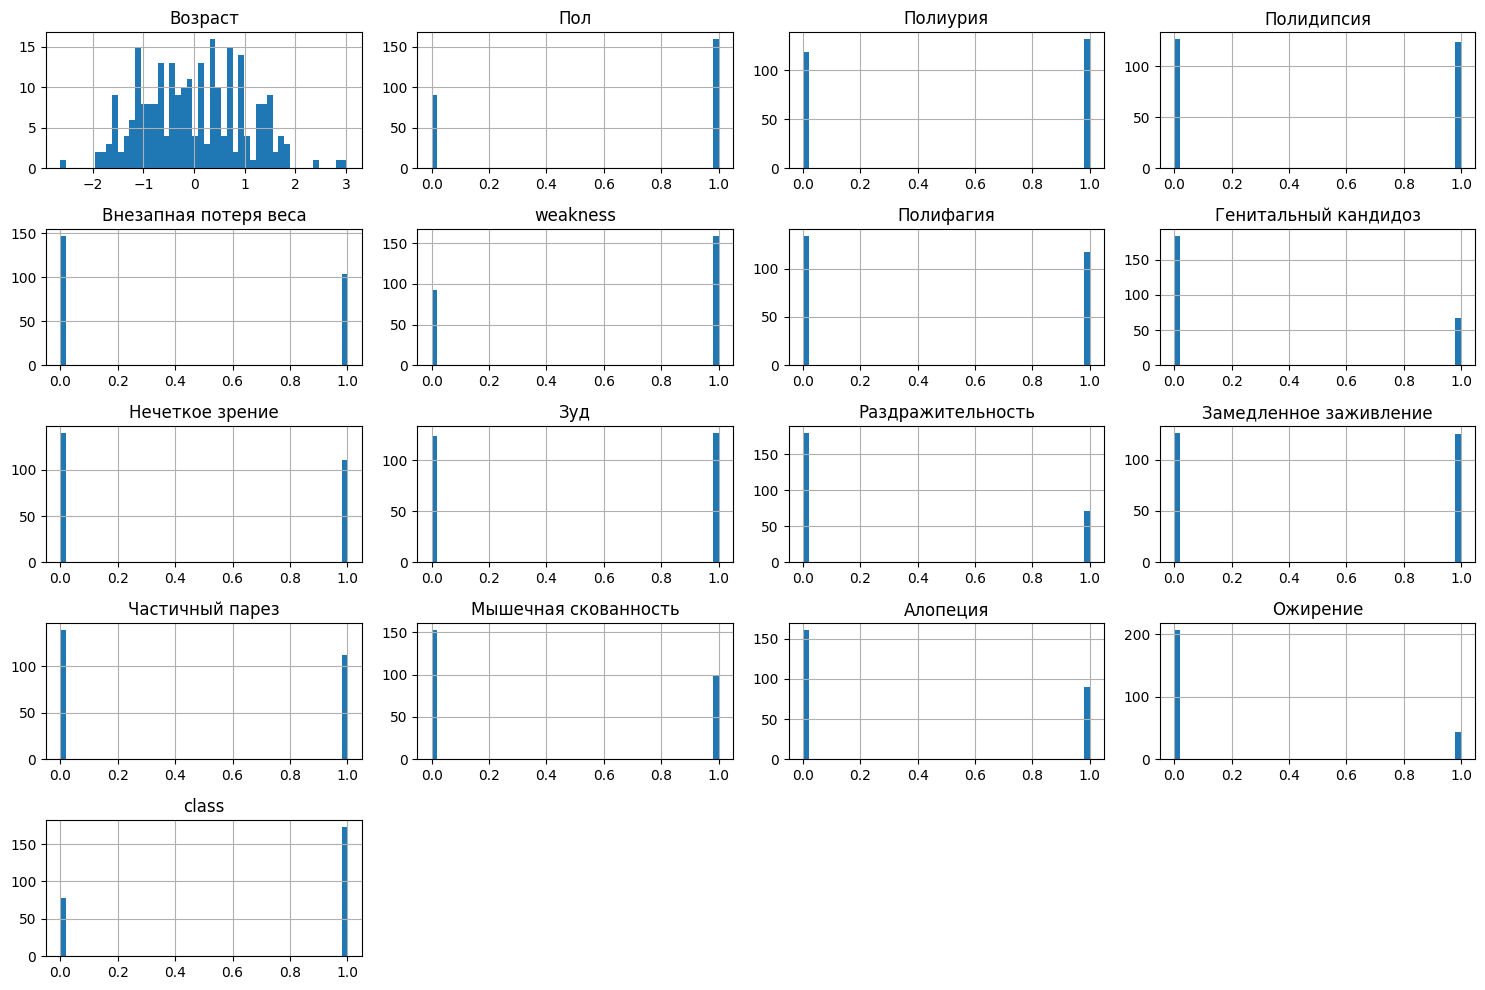

In [ ]:
df_rus.hist(figsize=(15, 10), bins=50)
plt.tight_layout()

In [ ]:
column_translation = {
    'Age': 'Возраст',
    'Gender': 'Пол',
    'Polyuria': 'Полиурия',
    'Polydipsia': 'Полидипсия',
    'sudden weight loss': 'Внезапная потеря веса',
    'Weakness': 'Слабость',
    'Polyphagia': 'Полифагия',
    'Genital thrush': 'Генитальный кандидоз',
    'visual blurring': 'Нечеткое зрение',
    'Itching': 'Зуд',
    'Irritability': 'Раздражительность',
    'delayed healing': 'Замедленное заживление',
    'partial paresis': 'Частичный парез',
    'muscle stiffness': 'Мышечная скованность',
    'Alopecia': 'Алопеция',
    'Obesity': 'Ожирение',
    'сlass': 'Класс',
}

In [ ]:
new_column_names = {}
for eng_name, rus_name in column_translation.items():
    if eng_name in df.columns:
        new_column_names[eng_name] = rus_name

df_rus = df.rename(columns=new_column_names)
print(f"Переименовано колонок: {len(new_column_names)}")
print("Новые названия колонок:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Переименовано колонок: 15
Новые названия колонок:
1. Age
2. Gender
3. Polyuria
4. Polydipsia
5. sudden weight loss
6. weakness
7. Polyphagia
8. Genital thrush
9. visual blurring
10. Itching
11. Irritability
12. delayed healing
13. partial paresis
14. muscle stiffness
15. Alopecia
16. Obesity
17. class


In [ ]:
df_rus

,Возраст,Пол,Полиурия,Полидипсия,Внезапная потеря веса,weakness,Полифагия,Генитальный кандидоз,Нечеткое зрение,Зуд,Раздражительность,Замедленное заживление,Частичный парез,Мышечная скованность,Алопеция,Ожирение,class
0,-0.710490,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.734476,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,-0.630214,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,-0.309110,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.895028,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,-0.790765,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,-0.068282,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,0.734476,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,-1.352697,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(["class"], axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (200, 16)
X_test: (51, 16)
y_train: (200,)
y_test: (51,)


In [ ]:
#Обучение нескольких моделей
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    'Логистическая регрессия': LogisticRegression(random_state=42, max_iter=1000),
    'Дерево решений': DecisionTreeClassifier(random_state=42),
    'Случайный лес': RandomForestClassifier(random_state=42),
    'Градиентный бустинг': GradientBoostingClassifier(random_state=42),
    'Метод опорных векторов': SVC(random_state=42, probability=True),
    'K-ближайших соседей': KNeighborsClassifier(),
    'Наивный Байес': GaussianNB()
}

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
# Обучение и оценка моделей
results = []

print("\n" + "="*80)
print("ОБУЧЕНИЕ МОДЕЛЕЙ")
print("="*80)

for name, model in models.items():
    print(f"\n{name}:")
    model.fit(X_train, y_train)

    # Предсказания
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # ROC-AUC
    roc_auc = None
    if y_pred_proba is not None and len(np.unique(y_test)) == 2:
        roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Кросс-валидация
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    # Сохраняем результаты
    results.append({
        'Модель': name,
        'Точность': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC-AUC': roc_auc,
        'CV среднее': cv_scores.mean(),
        'CV std': cv_scores.std()
    })

    print(f"  Точность: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    if roc_auc is not None:
        print(f"  ROC-AUC: {roc_auc:.4f}")
    print(f"  Кросс-валидация (5-fold): {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")


ОБУЧЕНИЕ МОДЕЛЕЙ

Логистическая регрессия:
  Точность: 0.8235
  Precision: 0.8497
  Recall: 0.8235
  F1-score: 0.8287
  ROC-AUC: 0.9250
  Кросс-валидация (5-fold): 0.8528 (±0.0508)

Дерево решений:
  Точность: 0.8235
  Precision: 0.8664
  Recall: 0.8235
  F1-score: 0.8296
  ROC-AUC: 0.8545
  Кросс-валидация (5-fold): 0.8325 (±0.0577)

Случайный лес:
  Точность: 0.9216
  Precision: 0.9373
  Recall: 0.9216
  F1-score: 0.9235
  ROC-AUC: 0.9634
  Кросс-валидация (5-fold): 0.9084 (±0.0324)

Градиентный бустинг:
  Точность: 0.8627
  Precision: 0.8875
  Recall: 0.8627
  F1-score: 0.8667
  ROC-AUC: 0.9518
  Кросс-валидация (5-fold): 0.8725 (±0.0559)

Метод опорных векторов:
  Точность: 0.9020
  Precision: 0.9125
  Recall: 0.9020
  F1-score: 0.9040
  ROC-AUC: 0.9554
  Кросс-валидация (5-fold): 0.9124 (±0.0298)

K-ближайших соседей:
  Точность: 0.8039
  Precision: 0.8793
  Recall: 0.8039
  F1-score: 0.8109
  ROC-AUC: 0.9482
  Кросс-валидация (5-fold): 0.8568 (±0.0377)

Наивный Байес:
  Точность


СРАВНЕНИЕ РЕЗУЛЬТАТОВ
                 Модель  Точность  Precision   Recall  F1-score  ROC-AUC  CV среднее   CV std
          Случайный лес  0.921569   0.937255 0.921569  0.923549 0.963393    0.908392 0.032409
 Метод опорных векторов  0.901961   0.912506 0.901961  0.903968 0.955357    0.912392 0.029786
    Градиентный бустинг  0.862745   0.887488 0.862745  0.866740 0.951786    0.872549 0.055893
          Наивный Байес  0.862745   0.887488 0.862745  0.866740 0.932143    0.868471 0.041330
Логистическая регрессия  0.823529   0.849673 0.823529  0.828666 0.925000    0.852784 0.050763
         Дерево решений  0.823529   0.866368 0.823529  0.829563 0.854464    0.832549 0.057688
    K-ближайших соседей  0.803922   0.879336 0.803922  0.810924 0.948214    0.856784 0.037665


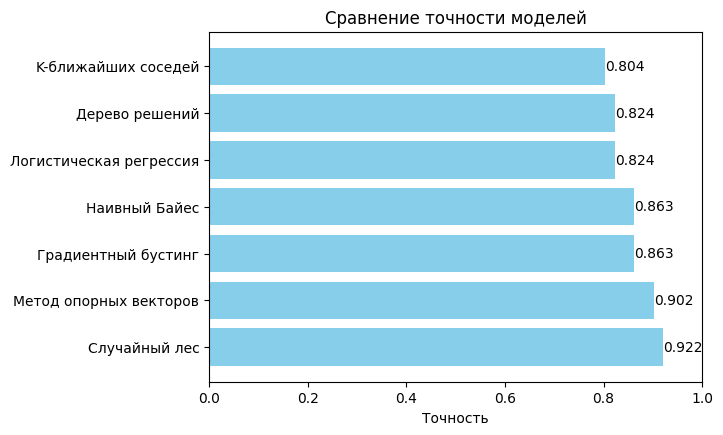

In [ ]:
#Сравнение результатов
results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ")
print("="*80)
print(results_df.sort_values('Точность', ascending=False).to_string(index=False))

plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sorted_results = results_df.sort_values('Точность', ascending=False)
bars = plt.barh(sorted_results['Модель'], sorted_results['Точность'], color='skyblue')
plt.xlabel('Точность')
plt.title('Сравнение точности моделей')
plt.xlim([0, 1])
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
             ha='left', va='center')


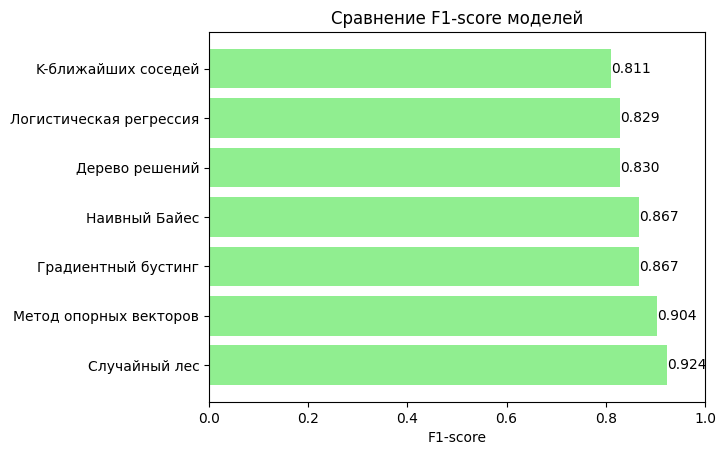

In [ ]:
# График 2: Сравнение F1-score
#plt.subplot(4, 4, 4)
sorted_f1 = results_df.sort_values('F1-score', ascending=False)
bars = plt.barh(sorted_f1['Модель'], sorted_f1['F1-score'], color='lightgreen')
plt.xlabel('F1-score')
plt.title('Сравнение F1-score моделей')
plt.xlim([0, 1])
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
             ha='left', va='center')

(0.0, 1.0)

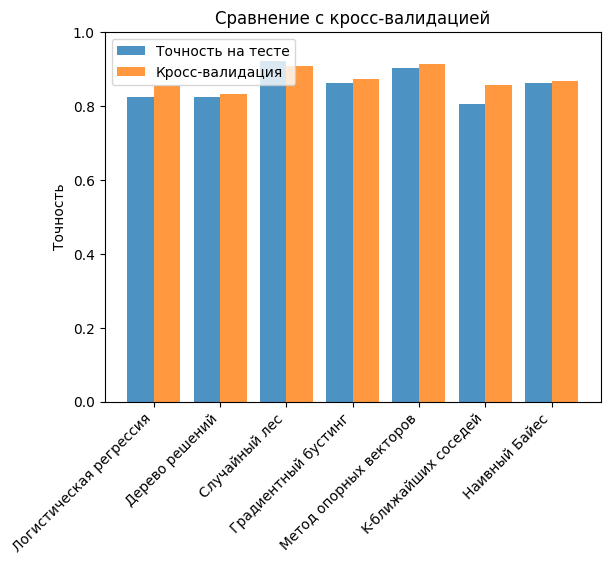

In [ ]:
# График 3: Кросс-валидация
#plt.subplot(2, 2, 3)
x = np.arange(len(results_df))
plt.bar(x - 0.2, results_df['Точность'], width=0.4, label='Точность на тесте', alpha=0.8)
plt.bar(x + 0.2, results_df['CV среднее'], width=0.4, label='Кросс-валидация', alpha=0.8)
plt.xticks(x, results_df['Модель'], rotation=45, ha='right')
plt.ylabel('Точность')
plt.title('Сравнение с кросс-валидацией')
plt.legend()
plt.ylim([0, 1])

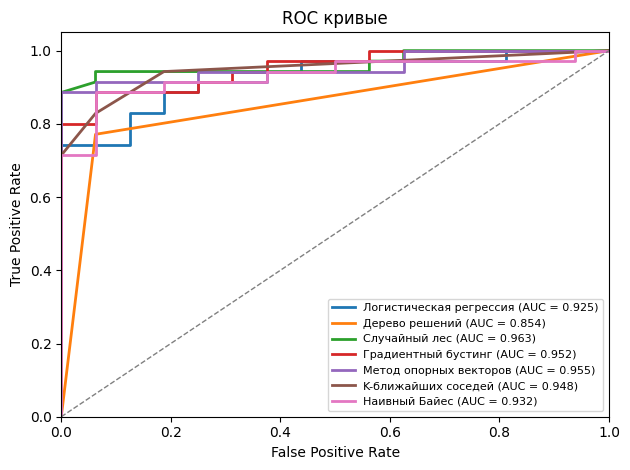

In [ ]:
# График 4: ROC кривые для моделей с вероятностями
#plt.subplot(2, 2, 4)
if len(np.unique(y)) == 2:
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            model.fit(X_train, y_train)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC кривые')
    plt.legend(loc="lower right", fontsize=8)
else:
    plt.text(0.5, 0.5, 'ROC кривые доступны\nтолько для бинарной\nклассификации',
             ha='center', va='center', fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 5. Выбор лучшей модели
best_model_name = results_df.loc[results_df['Точность'].idxmax(), 'Модель']
best_model = models[best_model_name]
best_model.fit(X_train, y_train)  # переобучаем на всех тренировочных данных

print(f"\n" + "="*80)
print(f"ЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
print("="*80)


ЛУЧШАЯ МОДЕЛЬ: Случайный лес


In [ ]:
#оценка лучшей модели
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

print("\nМетрики на тестовой выборке:")
print(f"Точность: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_best, average='weighted'):.4f}")

if y_pred_proba_best is not None and len(np.unique(y_test)) == 2:
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_best):.4f}")


Метрики на тестовой выборке:
Точность: 0.9216
Precision: 0.9373
Recall: 0.9216
F1-score: 0.9235
ROC-AUC: 0.9634



Матрица ошибок (Confusion Matrix):


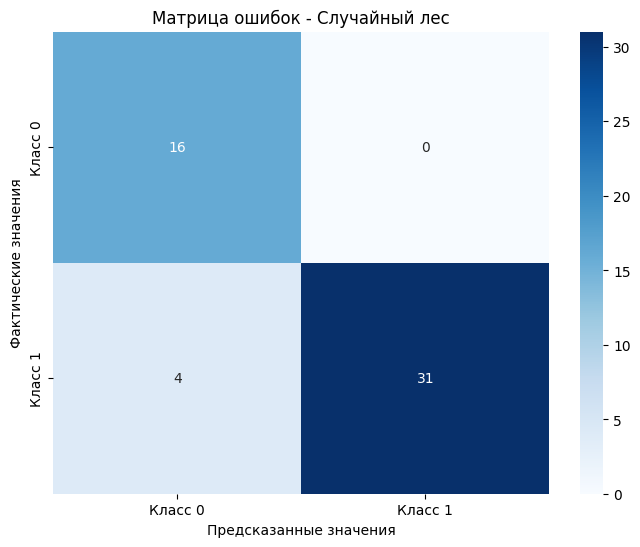

In [ ]:
# 6. Матрица ошибок для лучшей модели
print("\nМатрица ошибок (Confusion Matrix):")
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Класс 0', 'Класс 1'] if len(np.unique(y)) == 2 else None,
            yticklabels=['Класс 0', 'Класс 1'] if len(np.unique(y)) == 2 else None)
plt.ylabel('Фактические значения')
plt.xlabel('Предсказанные значения')
plt.title(f'Матрица ошибок - {best_model_name}')
plt.show()


Важность признаков:


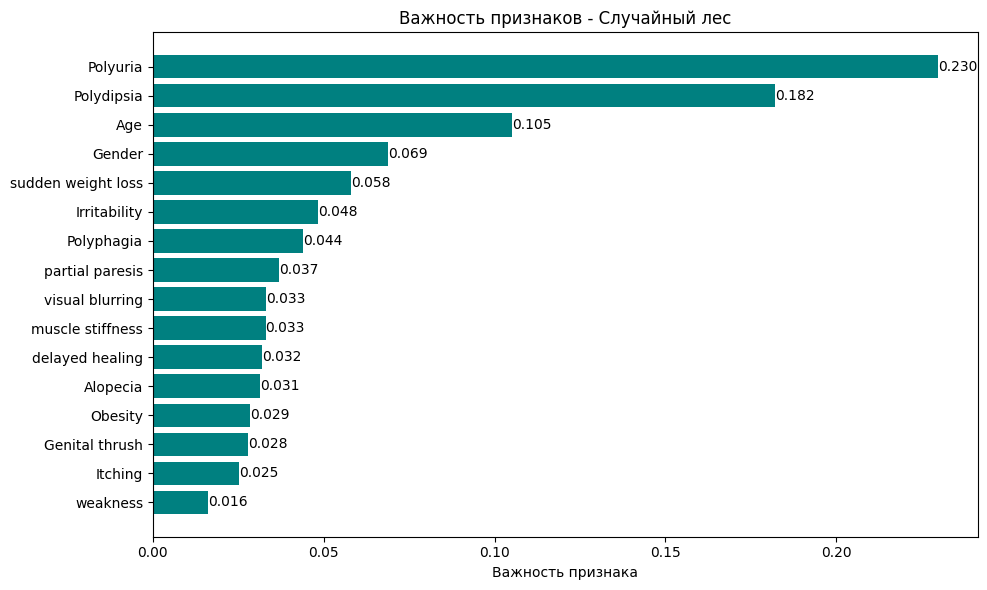

           Признак  Важность
          Polyuria  0.229820
        Polydipsia  0.181995
               Age  0.105004
            Gender  0.068746
sudden weight loss  0.058086
      Irritability  0.048310
        Polyphagia  0.043925
   partial paresis  0.036980
   visual blurring  0.033104
  muscle stiffness  0.032982
   delayed healing  0.031917
          Alopecia  0.031343
           Obesity  0.028523
    Genital thrush  0.027772
           Itching  0.025337
          weakness  0.016157


In [ ]:
# 8. Важность признаков
if hasattr(best_model, 'feature_importances_'):
    print("\nВажность признаков:")
    feature_importance = pd.DataFrame({
        'Признак': X.columns,
        'Важность': best_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('Важность', ascending=False)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(feature_importance['Признак'], feature_importance['Важность'], color='teal')
    plt.xlabel('Важность признака')
    plt.title(f'Важность признаков - {best_model_name}')
    plt.gca().invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
                 ha='left', va='center')

    plt.tight_layout()
    plt.show()

    print(feature_importance.to_string(index=False))

elif hasattr(best_model, 'coef_') and len(best_model.coef_) > 0:
    print("\nКоэффициенты модели (для логистической регрессии):")
    coef_df = pd.DataFrame({
        'Признак': X.columns,
        'Коэффициент': best_model.coef_[0]
    })
    coef_df = coef_df.sort_values('Коэффициент', ascending=False)

    plt.figure(figsize=(10, 6))
    colors = ['red' if x < 0 else 'green' for x in coef_df['Коэффициент']]
    bars = plt.barh(coef_df['Признак'], coef_df['Коэффициент'], color=colors)
    plt.xlabel('Коэффициент')
    plt.title(f'Коэффициенты признаков - {best_model_name}')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.gca().invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
                 ha='left' if width > 0 else 'right', va='center')

    plt.tight_layout()
    plt.show()

    print(coef_df.to_string(index=False))

In [ ]:
# 9. Настройка гиперпараметров для лучшей модели (опционально)
print("\n" + "="*80)
print("НАСТРОЙКА ГИПЕРПАРАМЕТРОВ (ГРИД СЕРЧ)")
print("="*80)

# Параметры для настройки в зависимости от модели
param_grids = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10]}


НАСТРОЙКА ГИПЕРПАРАМЕТРОВ (ГРИД СЕРЧ)


In [ ]:
#Подбор лучших параметров

In [ ]:
grid_search = GridSearchCV(
        best_model,
        param_grids,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

In [ ]:
grid_search.fit(X_train, y_train)

print(f"\nЛучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность на кросс-валидации: {grid_search.best_score_:.4f}")

# Оценка на тестовой выборке
best_model_tuned = grid_search.best_estimator_
y_pred_tuned = best_model_tuned.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Лучшие параметры: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
Лучшая точность на кросс-валидации: 0.9350


In [ ]:
print(f"Точность на тестовой выборке после настройки: {accuracy_tuned:.4f}")

# Сравнение с исходной моделью
improvement = accuracy_tuned - accuracy_score(y_test, y_pred_best)
print(f"Улучшение: {improvement:.4f} ({improvement*100:.2f}%)")

Точность на тестовой выборке после настройки: 0.9216
Улучшение: 0.0000 (0.00%)


улучшение 0% :))))))))))))))))))))))

In [2]:
!ssh-keygen -t rsa -b 4096 -C "ifonlyheknow@yandex.ru"

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): ml
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in ml
Your public key has been saved in ml.pub
The key fingerprint is:
SHA256:E+j+naEIh49W5LPay2TKHSRFkolSa8HSMI8BCffeQLQ ifonlyheknow@yandex.ru
The key's randomart image is:
+---[RSA 4096]----+
|O*+o+o.          |
|+*+=o+ .         |
|.o+ E o .        |
| . . =.  .       |
|    oo+ S        |
|     =+  .       |
|    o.*o  .      |
|   ..%.+ o o     |
|   .=.B.o o      |
+----[SHA256]-----+
